# Loan Prediction using Machine Learning

This ML task requires you to build a model that will classify how much loan the user can take. 
Columns that are available in train data are user’s marital status, education, number of dependents, and employments.
The train data has a loan status column with Y or N values stating whether user can take loan amount specified or not.

You can choose an algorithm to build this model. Kindly apply cross validation during training and state the features important in building the model.

Deliverables
- csv output of predicted classification of test data
- feature importance
- train and test scores (mean score and standard deviation)

**NB:** Kindly add comments to the cells describing what is done at each step

In [2]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading input data
train_data = pd.read_csv("loan_train_data.csv")
test_data = pd.read_csv("loan_test_data.csv")

In [4]:
#check train and test shape
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [5]:
#check first five rows for train data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#check first five rows for test data
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#check last five rows for train_data
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
#check last five rows for test_data
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [9]:
#check for missing data
#function to display percentage of missing data
def missing_statistics(df):    
    statitics = pd.DataFrame(df.isnull().sum()).reset_index()
    statitics.columns=['COLUMN NAME',"MISSING VALUES"]
    statitics['TOTAL ROWS'] = df.shape[0]
    statitics['% MISSING'] = round((statitics['MISSING VALUES']/statitics['TOTAL ROWS'])*100,2)
    return statitics

In [10]:
missing_statistics(train_data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,Loan_ID,0,614,0.00
1,Gender,13,614,2.12
2,Married,3,614,0.49
3,Dependents,15,614,2.44
4,Education,0,614,0.00
5,Self_Employed,32,614,5.21
6,ApplicantIncome,0,614,0.00
7,CoapplicantIncome,0,614,0.00
8,LoanAmount,22,614,3.58
9,Loan_Amount_Term,14,614,2.28


In [11]:
#check data types
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
#drop missing rows in train data
data = train_data.dropna()

In [13]:
missing_statistics(data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,Loan_ID,0,480,0.0
1,Gender,0,480,0.0
2,Married,0,480,0.0
3,Dependents,0,480,0.0
4,Education,0,480,0.0
5,Self_Employed,0,480,0.0
6,ApplicantIncome,0,480,0.0
7,CoapplicantIncome,0,480,0.0
8,LoanAmount,0,480,0.0
9,Loan_Amount_Term,0,480,0.0


In [14]:
#check for missing data in test data
missing_statistics(test_data)

,COLUMN NAME,MISSING VALUES,TOTAL ROWS,% MISSING
0,Loan_ID,0,367,0.00
1,Gender,11,367,3.00
2,Married,0,367,0.00
3,Dependents,10,367,2.72
4,Education,0,367,0.00
5,Self_Employed,23,367,6.27
6,ApplicantIncome,0,367,0.00
7,CoapplicantIncome,0,367,0.00
8,LoanAmount,5,367,1.36
9,Loan_Amount_Term,6,367,1.63


In [15]:
#drop missing rows in test data 
testing = test_data.dropna()

In [16]:
import seaborn as sns #for visualisation

Number of Yes: 332
Number of No: 148


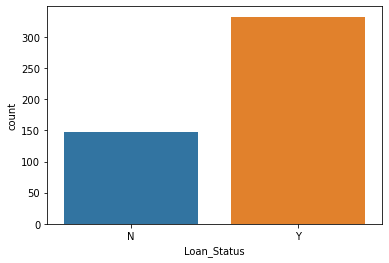

In [17]:
#Number of loan applications apporved and denied 
sns.countplot(data=data, x = 'Loan_Status', label = 'count')
Y, N = data['Loan_Status'].value_counts()
print('Number of Yes:', Y)
print('Number of No:', N)

In [18]:
data['Dependents'].value_counts() #individual items in the Dependent column

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [19]:
data['Property_Area'].value_counts() #individual items in the property areaq counts

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [20]:
import numpy as np

# Feature Engineering

In [21]:
data['Dependents'].replace('3+',3,inplace=True) #replace 3+ with 3 in train data
testing['Dependents'].replace('3+',3,inplace=True) #replace 3+ with 3 in test data

In [22]:
#convert categorical data to binary 
cleanup = {"Gender":     {"Male": 1, "Female": 0}, #1 for male, 0 for female
           "Married": {"Yes": 1, "No": 0}, #1 for Yes, 0 for No
           "Education": {"Not Graduate": 0, "Graduate": 1}, #1 for Graduate, 0 for Not_Graduate
           "Self_Employed": {"No":0, "Yes":1}, #0 for No, ! for Yes
            "Property_Area": {"Semiurban":0, "Urban":1, "Rural":0}, #1 for urban, 0 for non-urban
            "Dependents": {"0":0, "1":1, "2":1, "3":1}, #1 for dependents, 0 for no dependents
            "Loan_Status": {"Y":1, "N":0}} # 1 for Y, 0 for N
           

In [23]:
#replace categorical values in train data
data = data.replace(cleanup)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [24]:
#do same for test data
cleanup_test = {"Gender":     {"Male": 1, "Female": 0},
                "Married": {"Yes": 1, "No": 0},
                "Dependents": {"0": 0, "1": 1, "2":1, "3":1}, #1 for dependents, 0 for no dependents
               "Education": {"Not Graduate": 0, "Graduate": 1},
               "Self_Employed": {"No":0, "Yes":1},
                "Property_Area": {"Semiurban":0, "Urban":1, "Rural":0}} #1 for urban, 0 for non-urban
                

In [25]:
#replace categorical values in test data
testing = testing.replace(cleanup_test)
testing.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,1,1,0,5000,1800,208.0,360.0,1.0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,1
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,1


In [26]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

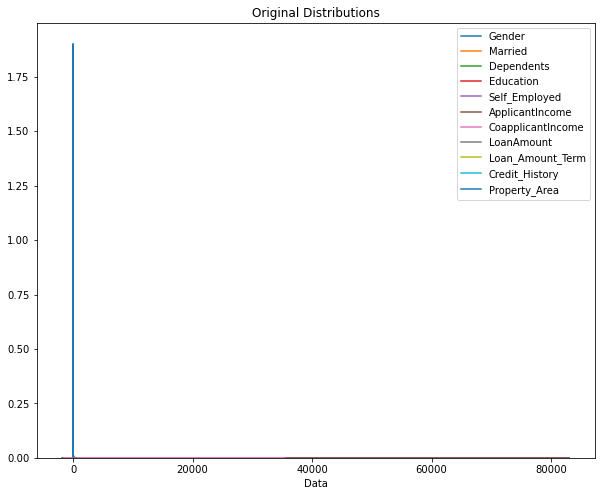

In [27]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')
ax1.set(xlabel='Data')

sns.kdeplot(data['Gender'], ax=ax1)
sns.kdeplot(data['Married'], ax=ax1)
sns.kdeplot(data['Dependents'], ax=ax1)
sns.kdeplot(data['Education'], ax=ax1)
sns.kdeplot(data['Self_Employed'], ax=ax1)
sns.kdeplot(data['ApplicantIncome'], ax=ax1)
sns.kdeplot(data['CoapplicantIncome'], ax=ax1)
sns.kdeplot(data['LoanAmount'], ax=ax1)
sns.kdeplot(data['Loan_Amount_Term'], ax=ax1)
sns.kdeplot(data['Credit_History'], ax=ax1)
sns.kdeplot(data['Property_Area'], ax=ax1);

Data is heavily skewed

In [28]:
#creating a new dataframe for training independent variables
input_data = data.drop('Loan_ID' , axis = 1) 

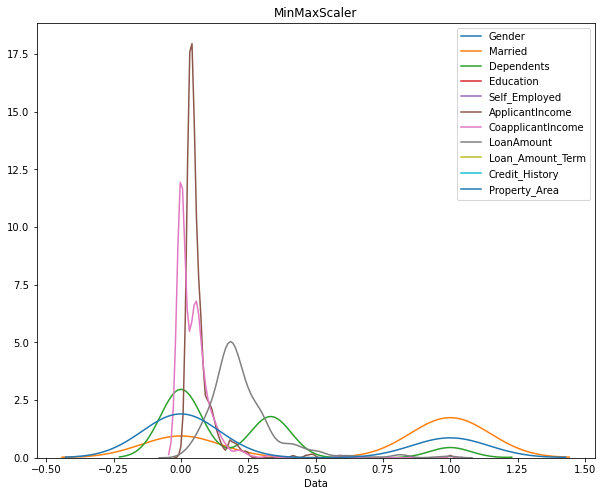

In [29]:
# Apply Min Max Scaler
mm_scaler = preprocessing.MinMaxScaler()
col_names = list(input_data.columns)
input_data_mm = mm_scaler.fit_transform(input_data)

input_data_mm = pd.DataFrame(input_data_mm, columns=col_names)

#After Min max Scale
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('MinMaxScaler')
ax1.set(xlabel='Data')
sns.kdeplot(input_data_mm['Gender'], ax=ax1)
sns.kdeplot(input_data_mm['Married'], ax=ax1)
sns.kdeplot(input_data_mm['Dependents'], ax=ax1)
sns.kdeplot(input_data_mm['Education'], ax=ax1)
sns.kdeplot(input_data_mm['Self_Employed'], ax=ax1)
sns.kdeplot(input_data_mm['ApplicantIncome'], ax=ax1)
sns.kdeplot(input_data_mm['CoapplicantIncome'], ax=ax1)
sns.kdeplot(input_data_mm['LoanAmount'], ax=ax1)
sns.kdeplot(input_data_mm['Loan_Amount_Term'], ax=ax1)
sns.kdeplot(input_data_mm['Credit_History'], ax=ax1)
sns.kdeplot(input_data_mm['Property_Area'], ax=ax1);

In [32]:
#creating a new dataframe for testing independent variables
test_input_data = testing.drop('Loan_ID' , axis = 1) 

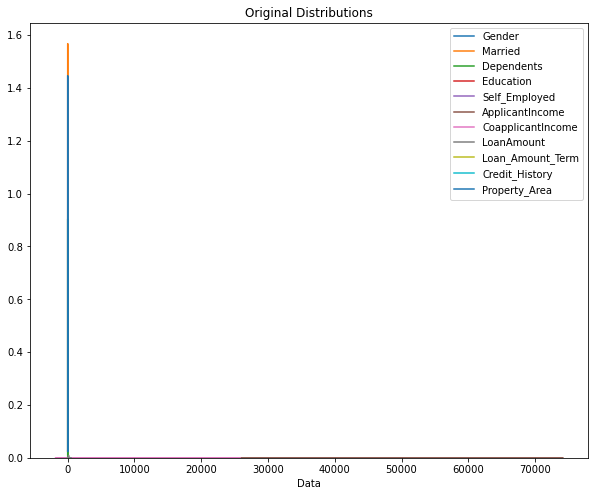

In [31]:
# plot original distribution plot for testing data
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')
ax1.set(xlabel='Data')

sns.kdeplot(test_input_data['Gender'], ax=ax1)
sns.kdeplot(test_input_data['Married'], ax=ax1)
sns.kdeplot(test_input_data['Dependents'], ax=ax1)
sns.kdeplot(test_input_data['Education'], ax=ax1)
sns.kdeplot(test_input_data['Self_Employed'], ax=ax1)
sns.kdeplot(test_input_data['ApplicantIncome'], ax=ax1)
sns.kdeplot(test_input_data['CoapplicantIncome'], ax=ax1)
sns.kdeplot(test_input_data['LoanAmount'], ax=ax1)
sns.kdeplot(test_input_data['Loan_Amount_Term'], ax=ax1)
sns.kdeplot(test_input_data['Credit_History'], ax=ax1)
sns.kdeplot(test_input_data['Property_Area'], ax=ax1);

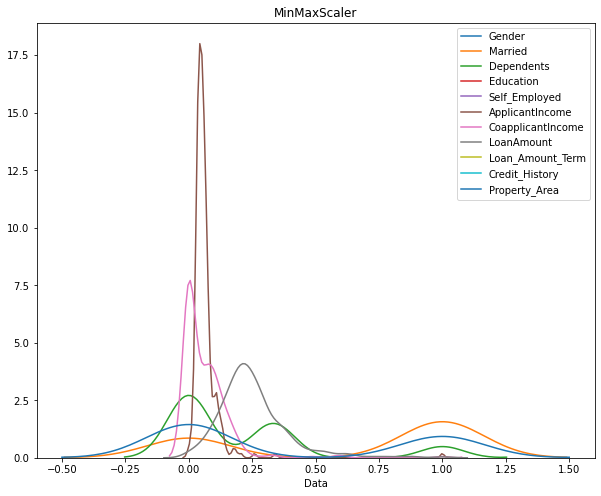

In [33]:
#Apply Min Max Scaler for testing data
mm_scaler = preprocessing.MinMaxScaler()
col_names = list(test_input_data.columns)
testing_input_data_mm = mm_scaler.fit_transform(test_input_data)

testing_input_data_mm = pd.DataFrame(testing_input_data_mm, columns=col_names)

#After Min max Scale
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('MinMaxScaler')
ax1.set(xlabel='Data')
sns.kdeplot(testing_input_data_mm['Gender'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Married'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Dependents'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Education'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Self_Employed'], ax=ax1)
sns.kdeplot(testing_input_data_mm['ApplicantIncome'], ax=ax1)
sns.kdeplot(testing_input_data_mm['CoapplicantIncome'], ax=ax1)
sns.kdeplot(testing_input_data_mm['LoanAmount'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Loan_Amount_Term'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Credit_History'], ax=ax1)
sns.kdeplot(testing_input_data_mm['Property_Area'], ax=ax1);

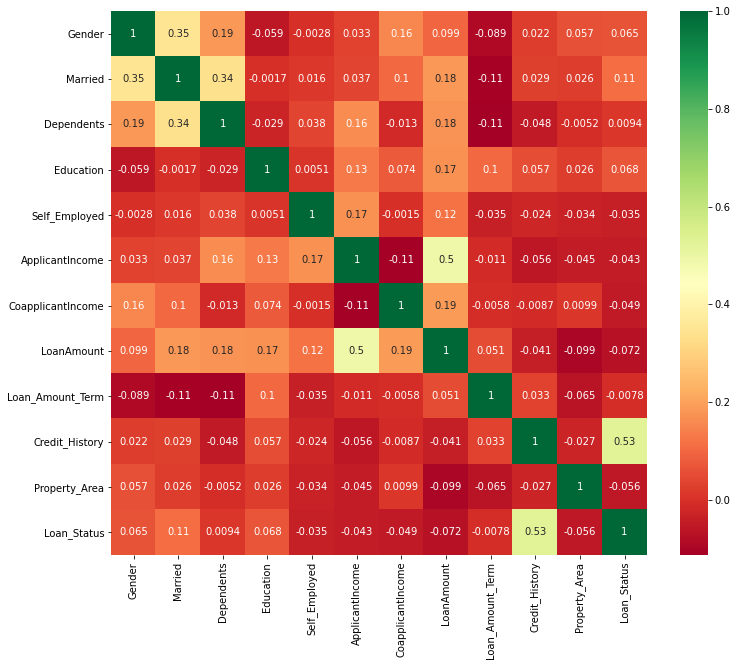

In [34]:
#plot correlation heatmap
plt.figure(figsize=(12,10))  
p=sns.heatmap(input_data_mm.corr(), annot=True,cmap ='RdYlGn')

In [35]:
#Building model
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [36]:
x = input_data_mm.drop('Loan_Status', axis = 1)
y = input_data_mm['Loan_Status']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [38]:
nb = GaussianNB()

In [39]:
nb.fit(X_train, y_train)

GaussianNB()

In [40]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(nb, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.806 (0.044)


Accuracy mean score = 0.806, std score = 0.044

In [41]:
#making predictions
predictions = nb.predict(testing_input_data_mm)

In [42]:
#writing predictions to csv 
predictions  = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

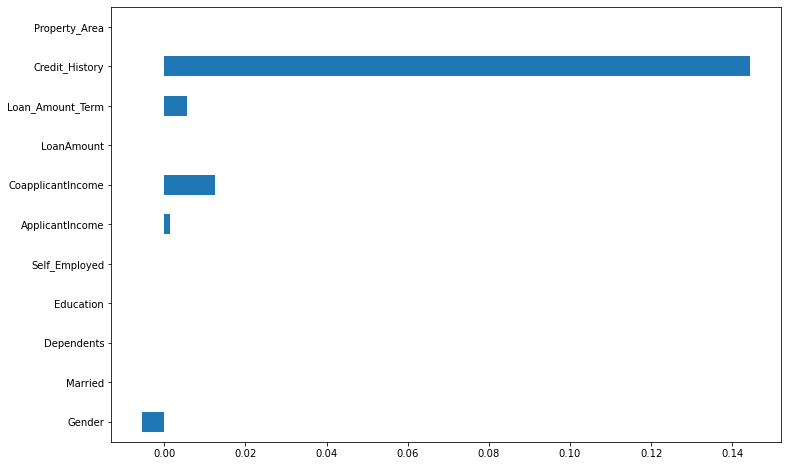

In [43]:
#plot feature importance
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, X_test, y_test)
a = imps.importances_mean
importances =  pd.Series(a, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

The GaussianNB does not offer an intrinsic method to evaluate feature importances. Naïve Bayes methods work by determining the conditional and unconditional probabilities associated with the features and predict the class with the highest probability.Hence, to get feature importance, use Permutation Importance.  The numbers here represent the mean difference in the score (here: accuracy) the algorithm determined when the values of a particular feature are randomly shuffled before obtaining the score. So for example, Credit history has a value of 0.12 which means that shuffling this feature resulted in a drop of 0.12 in accuracy. Hence, this feature is very important. The negative number mean the opposite: the accuracy actually increased when shuffling the corresponding feature, so they are not that important.

# Using Synthetic Minority Oversampling Technique and Scaling Only Numberical Values

In [44]:
#creating a new dataframe for training independent variables
input_scaled_data = data.drop('Loan_ID' , axis = 1) 

In [45]:
#for test data 
#creating a new dataframe for training independent variables
input_scaled_test = data.drop('Loan_ID' , axis = 1) 

In [51]:
# Apply Min Max Scaler
mm_scaler = preprocessing.MinMaxScaler()
input_scaled_data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']] = mm_scaler.fit_transform(input_scaled_data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']])

In [46]:
# Apply Min Max Scaler
mm_scaler = preprocessing.MinMaxScaler()
input_scaled_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']] = mm_scaler.fit_transform(input_scaled_data[['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term']])

In [47]:
X_scaled = input_scaled_data
y_scaled = input_scaled_data['Loan_Status']

In [57]:
!pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE 

In [49]:
from collections import Counter
counter = Counter(y_scaled)
print('Before', counter)

Before Counter({1: 332, 0: 148})


In [50]:
sm= SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_scaled, y_scaled)
counter = Counter(y_train_sm)
print('After',counter)

After Counter({0: 332, 1: 332})


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.30, random_state=42)
nb.fit(X_train, y_train)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(nb, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.996 (0.010)


In [52]:
#making predictions
predictions_smote = nb.predict(input_scaled_test)

In [53]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.30, random_state=42)
logreg.fit(X_train, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(logreg, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 0.991 (0.010)


In [55]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.30, random_state=42)
clf.fit(X_train, y_train)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(clf, X_train_sm, y_train_sm, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' %  (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)
